In [1]:
import numpy as np

import matplotlib
# this is needed for interactive plots to be displayed properly
matplotlib.use('Agg')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
# allow interactive plots
%matplotlib notebook

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(279)

In [14]:
n_train = 15
n_test = 15

x_train = np.random.uniform(0, 1, n_train)
x_test = np.random.uniform(0, 1, n_test)
x_grid = np.linspace(0, 1, 100000)

p3 = np.array([-44, 66, -1, 5])
y_train = np.polyval(p3, x_train) + np.random.normal(scale=1.0, size=n_train)
y_test = np.polyval(p3, x_test) + np.random.normal(scale=1.0, size=n_test)

In [5]:
lm = LinearRegression()

n_models = n_train

ymodels = []
train_err = []
test_err = []

for i in range(1,n_models+1):
    pmodel = Pipeline([('poly', PolynomialFeatures(degree=i)),
                   ('linear', LinearRegression(fit_intercept=False))])
    pmodel.fit(x_train.reshape(-1, 1), y_train)
    ymodels.append(pmodel.predict(x_grid.reshape(-1, 1)))
    y_train_pred = pmodel.predict(x_train.reshape(-1, 1))
    y_test_pred = pmodel.predict(x_test.reshape(-1, 1))
    train_err.append(np.sqrt(np.linalg.norm(y_train_pred - y_train) / n_train))
    test_err.append(np.sqrt(np.linalg.norm(y_test_pred - y_test) / n_test))

In [6]:
print("Optimal training error for degree: ", np.argmin(train_err)+1)
print("Optimal test error for degree: ", np.argmin(test_err)+1)
opt_degree = np.argmin(test_err)+1

Optimal training error for degree:  15
Optimal test error for degree:  7


<IPython.core.display.Javascript object>


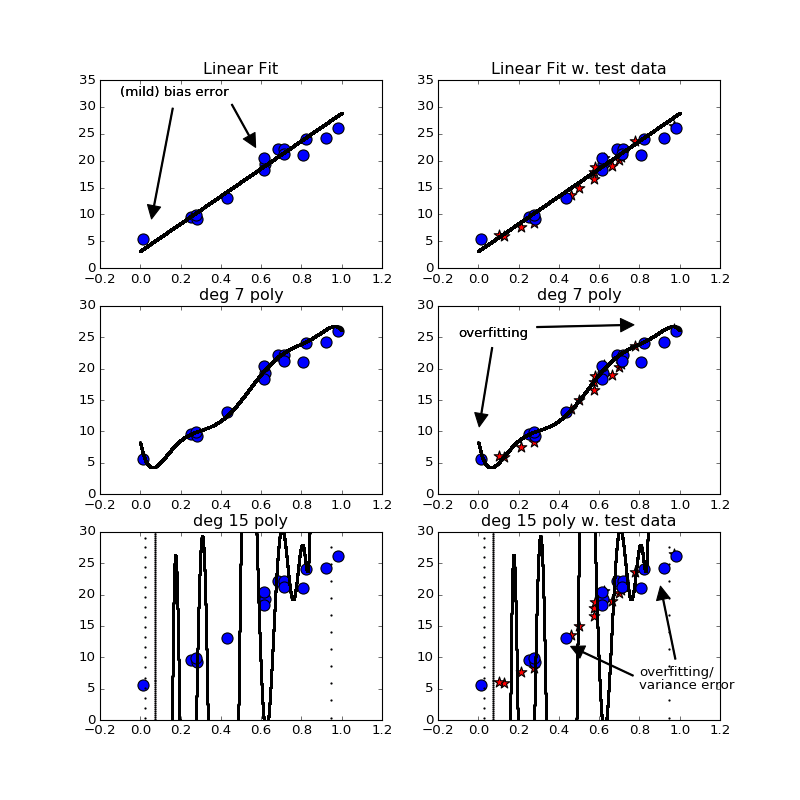

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax[0,0].scatter(x_train, y_train, s=100)
ax[0,0].scatter(x_grid, ymodels[1-1], s=1, c='m')
ax[0,0].set_title('Linear Fit')
ax[0,0].annotate('(mild) bias error', xy=(0.05, 8), xytext=(-0.1, 32),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )
ax[0,0].annotate('(mild) bias error', xy=(0.58, 22), xytext=(-0.1, 32),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )

ax[0,1].scatter(x_test, y_test, s=100, c='r', marker='*')
ax[0,1].scatter(x_train, y_train, s=100)
ax[0,1].scatter(x_grid, ymodels[1-1], s=1, c='m')
ax[0,1].set_title('Linear Fit w. test data')

ax[1,0].scatter(x_train, y_train, s=100)
ax[1,0].scatter(x_grid, ymodels[opt_degree-1], s=1, c='m')
ax[1,0].set_title('deg ' +str(opt_degree)+ ' poly')
ax[1,0].set_ylim([0,30])

ax[1,1].scatter(x_test, y_test, s=100, c='r', marker='*')
ax[1,1].scatter(x_train, y_train, s=100)
ax[1,1].scatter(x_grid, ymodels[opt_degree-1], s=1, c='m')
ax[1,1].set_title('deg ' +str(opt_degree)+ ' poly')
ax[1,1].set_ylim([0,30])
ax[1,1].annotate('overfitting', xy=(0, 10), xytext=(-0.1, 25),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )
ax[1,1].annotate('overfitting', xy=(0.8, 27), xytext=(-0.1, 25),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )

ax[2,0].scatter(x_train, y_train, s=100)
ax[2,0].scatter(x_grid, ymodels[n_train-1], s=1, c='m')
ax[2,0].set_title('deg ' +str(n_train)+ ' poly')
ax[2,0].set_ylim([0,30])

ax[2,1].scatter(x_test, y_test, s=100, c='r', marker='*')
ax[2,1].scatter(x_train, y_train, s=100)
ax[2,1].scatter(x_grid, ymodels[n_train-1], s=1, c='m')
ax[2,1].set_title('deg ' +str(n_train)+ ' poly w. test data')
ax[2,1].set_ylim([0,30])
ax[2,1].annotate('overfitting/', xy=(0.9, 22), xytext=(0.8, 7),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )
ax[2,1].annotate('variance error', xy=(0.44, 12), xytext=(0.8, 5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )

plt.show()

<IPython.core.display.Javascript object>


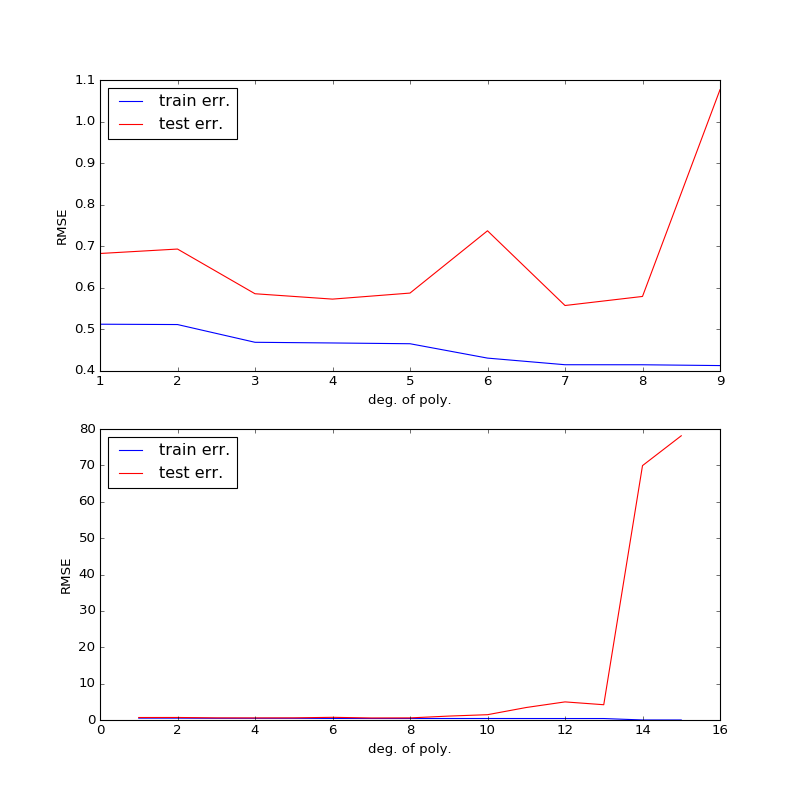

In [13]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))

cutoff = 9

ax[0].plot(range(1,cutoff+1), train_err[0:cutoff], label='train err.')
ax[0].plot(range(1,cutoff+1), test_err[0:cutoff], c='r', label='test err.')
ax[0].set_xlabel('deg. of poly.')
ax[0].set_ylabel('RMSE')
ax[0].legend(loc='upper left')

ax[1].plot(range(1,n_models+1), train_err, label='train err.')
ax[1].plot(range(1,n_models+1), test_err, c='r', label='test err.')
ax[1].set_xlabel('deg. of poly.')
ax[1].set_ylabel('RMSE')
ax[1].legend(loc='upper left')

plt.show()